In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

df = pd.read_csv("C:/Users/DELL/Downloads/archive (8)/adult.csv")


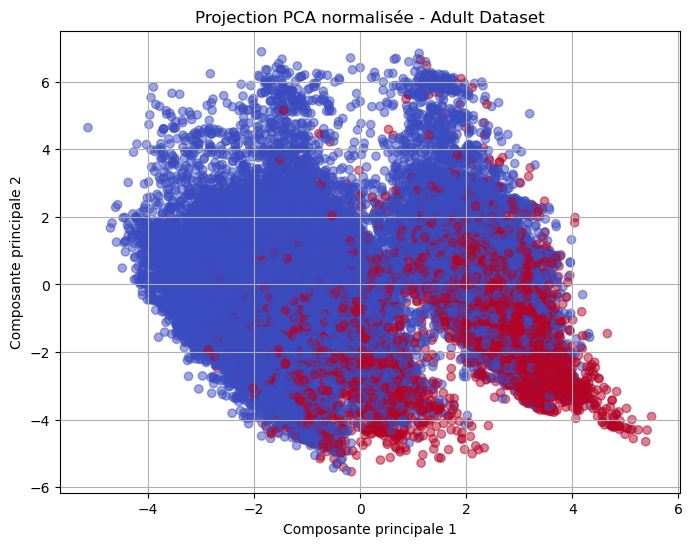

In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


X = df.drop(columns=["income"])
y = df["income"]

# Encodage des variables catégorielles
X_encoded = pd.get_dummies(X)

# Normalisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Affichage
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=(y == ">50K").astype(int), cmap='coolwarm', alpha=0.5)
plt.title("Projection PCA normalisée - Adult Dataset")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.grid()
plt.show()



In [4]:
#from sklearn.manifold import TSNE
# t-SNE
#tsne = TSNE(n_components=2, perplexity=30, random_state=42, n_iter=500)

#X_tsne = tsne.fit_transform(X_scaled)

# Création d'un DataFrame pour faciliter la visualisation
#df_tsne = pd.DataFrame()
#df_tsne['Dim 1'] = X_tsne[:, 0]
#df_tsne['Dim 2'] = X_tsne[:, 1]
#df_tsne['Classe'] = y.map({'>50K': 1, '<=50K': 0})  # Ajuste selon tes libellés

# Visualisation
#plt.figure(figsize=(10, 7))
#sns.scatterplot(data=df_tsne, x='Dim 1', y='Dim 2', hue='Classe', palette=['blue', 'red'], alpha=0.5)
#plt.title("Projection t-SNE - Adult Dataset")
#plt.show()


In [5]:
df = pd.read_csv("C:/Users/DELL/Downloads/archive (8)/adult.csv")

In [6]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [7]:
df.shape
df.info()
df.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


52

In [8]:
# Nettoyage simple
df = df.drop_duplicates()


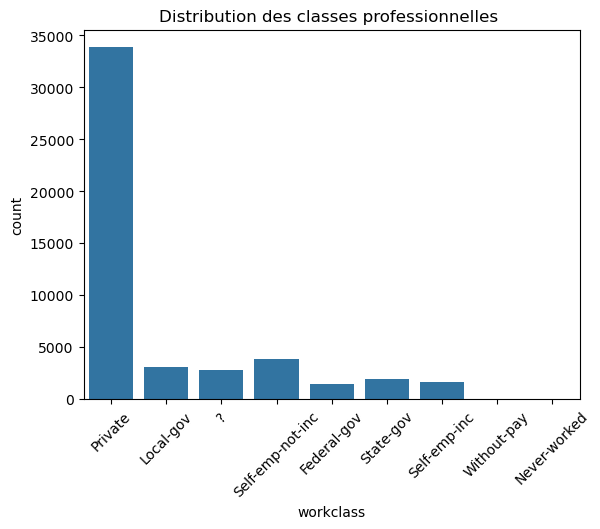

In [9]:
sns.countplot(data=df, x="workclass")
plt.title('Distribution des classes professionnelles ')
plt.xticks(rotation=45)
plt.show()

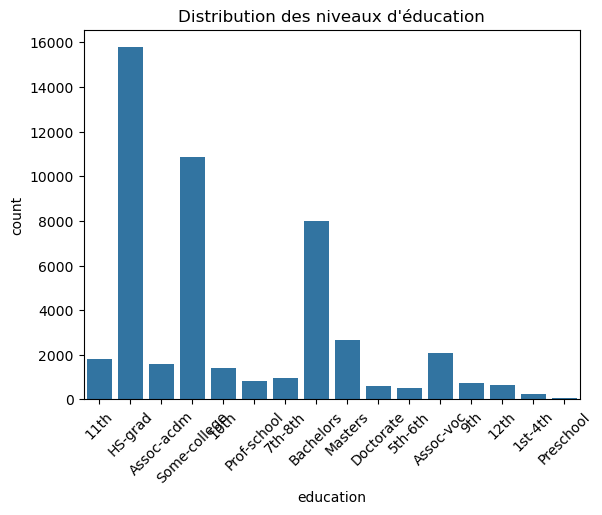

In [10]:
sns.countplot(data=df, x='education')
plt.title("Distribution des niveaux d'éducation")
plt.xticks(rotation=45)
plt.show()

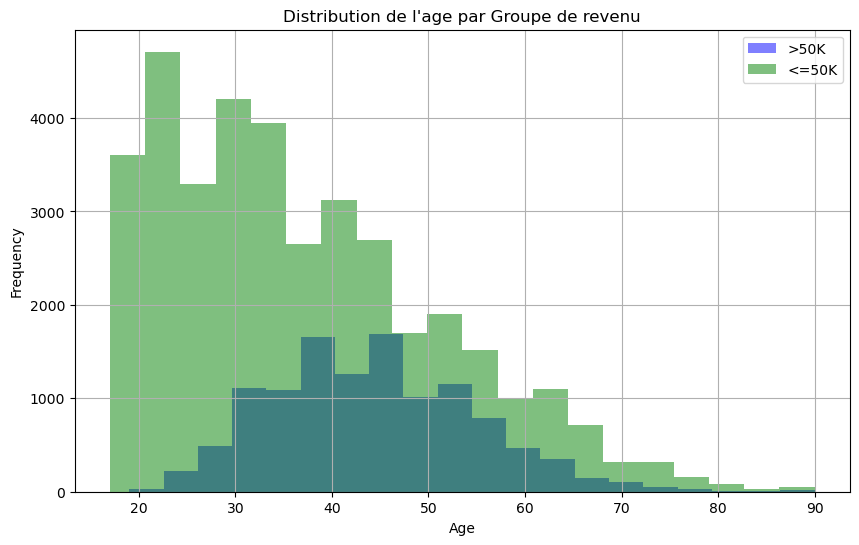

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(df[df['income'] == '>50K']['age'].dropna(), bins=20, alpha=0.5, label='>50K', color='blue')
plt.hist(df[df['income'] == '<=50K']['age'].dropna(), bins=20, alpha=0.5, label='<=50K', color='green')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title("Distribution de l'age par Groupe de revenu")
plt.legend()
plt.grid()
plt.show()

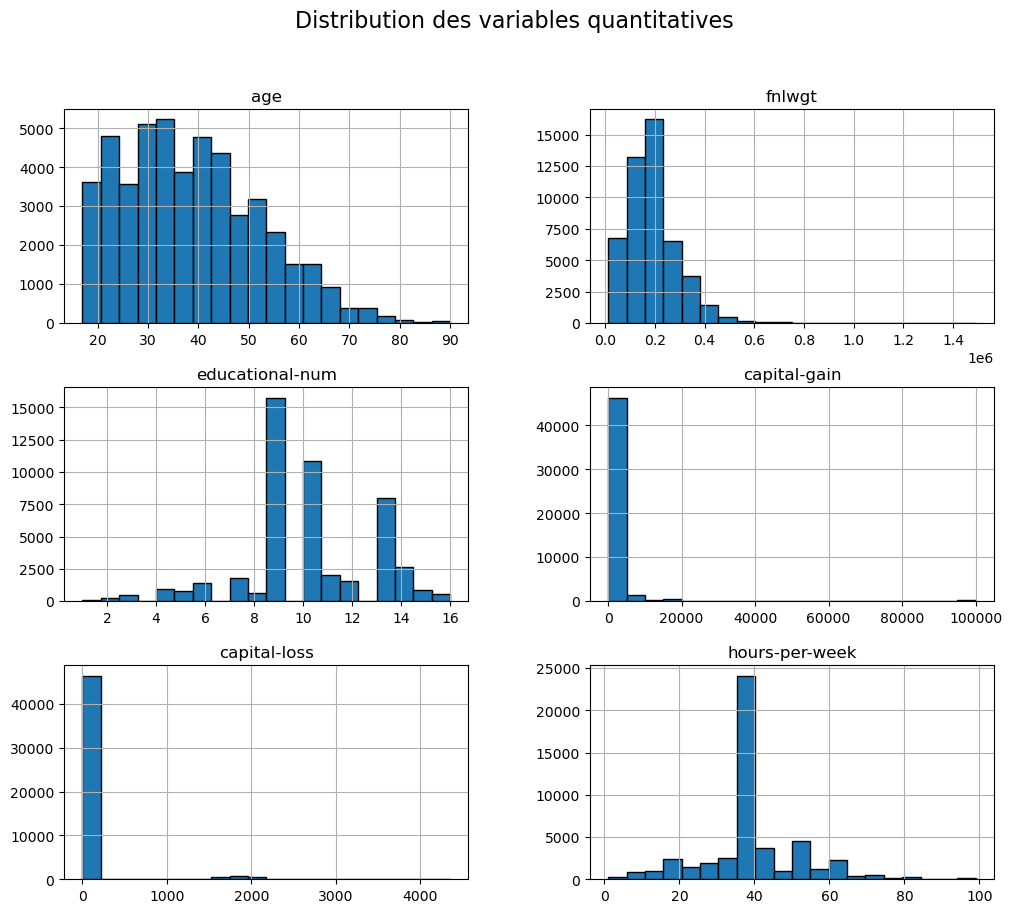

In [12]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_columns].hist(figsize=(12, 10), bins=20, edgecolor="black")
plt.suptitle("Distribution des variables quantitatives", fontsize=16)
plt.show()

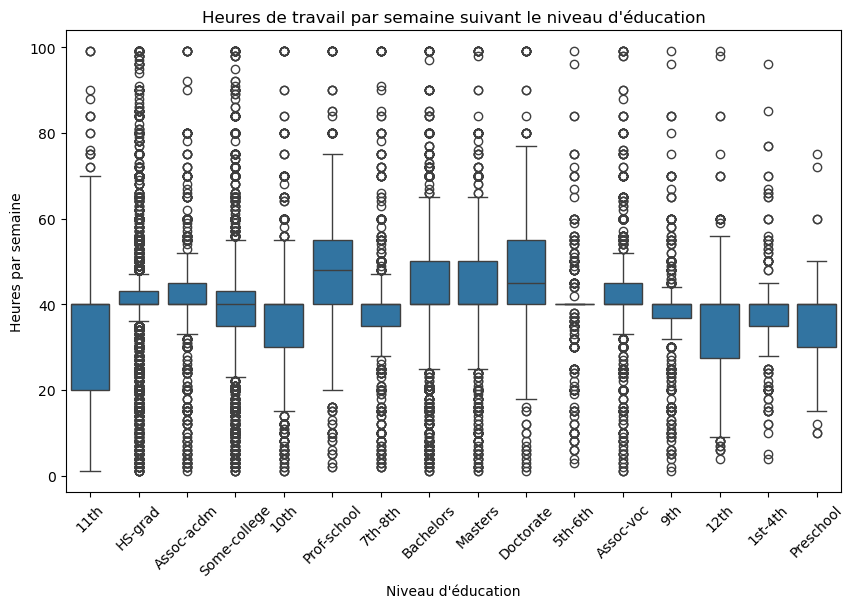

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='education', y='hours-per-week', data=df)
plt.xticks(rotation=45)
plt.title("Heures de travail par semaine suivant le niveau d'éducation")
plt.xlabel("Niveau d'éducation")
plt.ylabel("Heures par semaine")
plt.show()

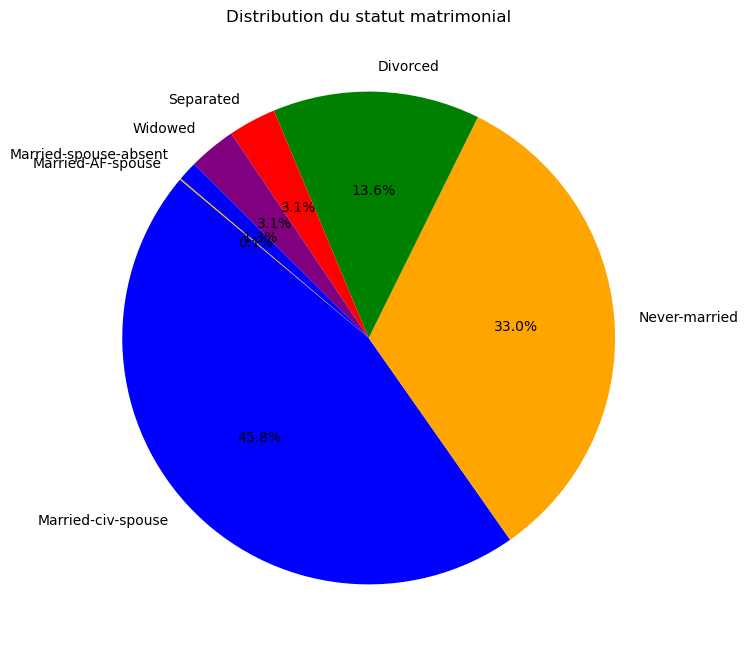

In [14]:
distribution = df['marital-status'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(distribution, labels=distribution.index, autopct='%1.1f%%', colors=['blue', 'orange', 'green', 'red', 'purple'], startangle=140)

plt.title('Distribution du statut matrimonial')

plt.show()

In [15]:
df.isnull().sum()


age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [16]:
df.isin(["?"]).sum()

age                   0
workclass          2795
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2805
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      856
income                0
dtype: int64

In [17]:
for col in df.columns:
    print(col,df[col].unique())

age [25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87 86]
workclass ['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
fnlwgt [226802  89814 336951 ... 129912 255835 257302]
education ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
educational-num [ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1]
marital-status ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
occupation ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport

Text(0.5, 1.0, 'Distribution par groupe')

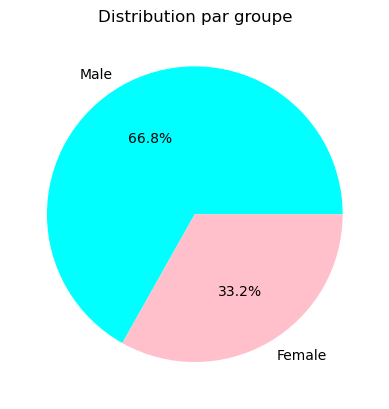

In [18]:
plt.pie(df['gender'].value_counts(), labels=df['gender'].value_counts().index, autopct='%1.1f%%', colors=['cyan', 'pink'])
plt.title('Distribution par groupe')


<module 'matplotlib.pyplot' from 'C:\\Users\\DELL\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

<Figure size 1000x600 with 0 Axes>

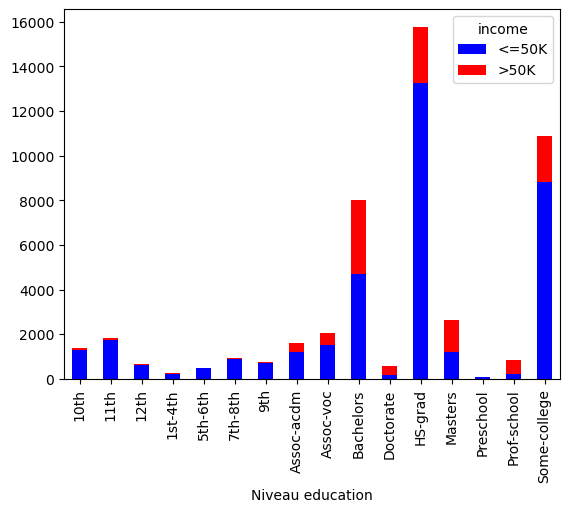

In [19]:
education_income_counts = df.groupby(['education', 'income']).size().unstack(fill_value=0)
plt.figure(figsize=(10, 6))
education_income_counts.plot(kind='bar', stacked=True, color=['blue', 'red'])
plt.xlabel('Niveau education')
plt

# PRE PROCESSING

In [20]:
df.replace("?", np.nan, inplace=True)


In [21]:
df.isna().sum()


age                   0
workclass          2795
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2805
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      856
income                0
dtype: int64

In [22]:
df.dropna(inplace=True)


In [23]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [24]:
# Colonnes catégorielles à encoder
cat_cols = ['education', 'native-country', 'gender', 'workclass', 'marital-status',
            'occupation', 'relationship', 'race']

for col in cat_cols:
    df[col] = df[col].astype('category').cat.codes


In [25]:
# Encodage cible
df['income'] = df['income'].str.strip().map({'>50K': 1, '<=50K': 0})




In [26]:
#outliers
numerical_columns = ['age', 'fnlwgt']


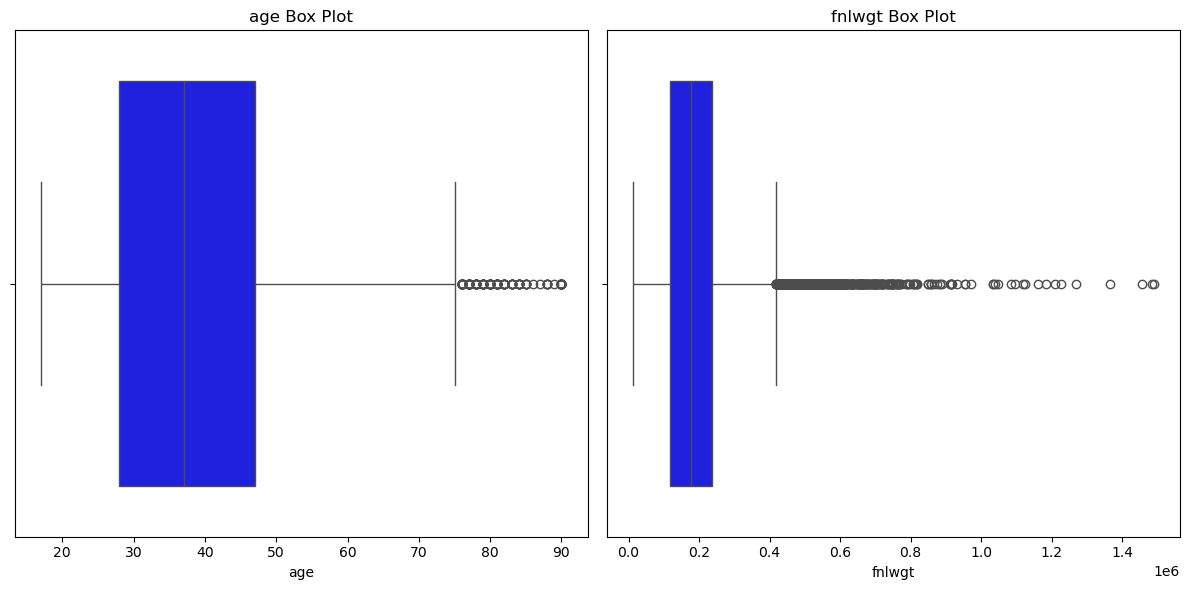

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for i, var in enumerate(numerical_columns):
    sns.boxplot(x=df[var], ax=axes[i], color='blue')
    axes[i].set_title(f'{var} Box Plot')

plt.tight_layout()
plt.show()

In [28]:
# Initialiser un masque (True pour toutes les lignes)
mask = np.ones(len(df), dtype=bool)

for col in numerical_columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Mettre à jour le masque
    mask = mask & (df[col] >= lower_bound) & (df[col] <= upper_bound)

# Appliquer le filtre une seule fois
df = df[mask]

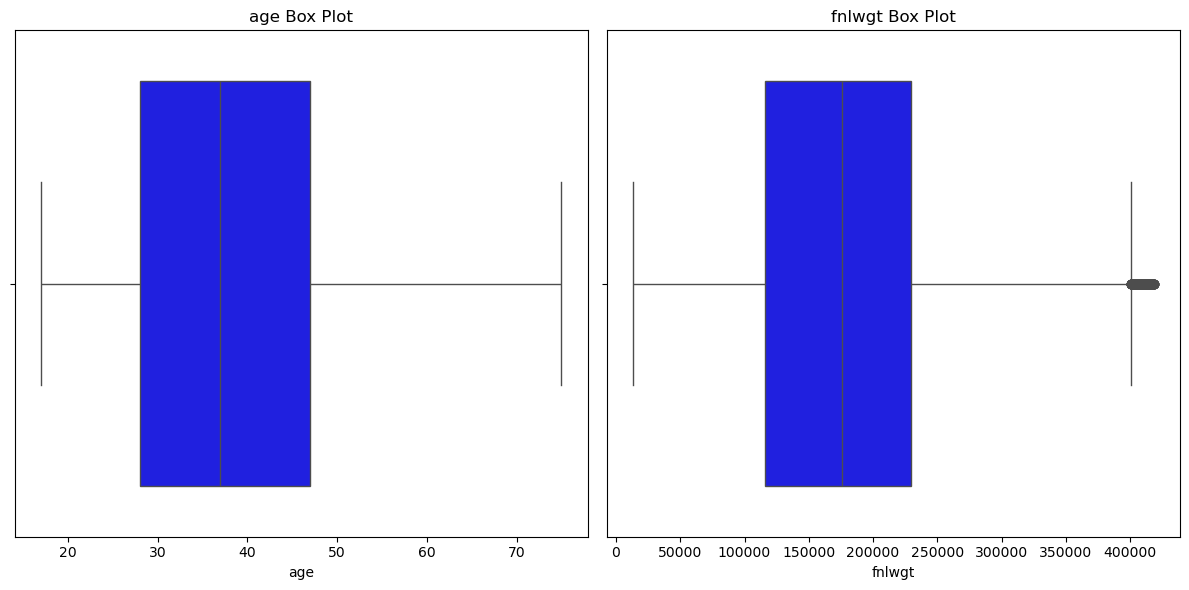

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for i, var in enumerate(numerical_columns):
    sns.boxplot(x=df[var], ax=axes[i], color='blue')
    axes[i].set_title(f'{var} Box Plot')

plt.tight_layout()
plt.show()

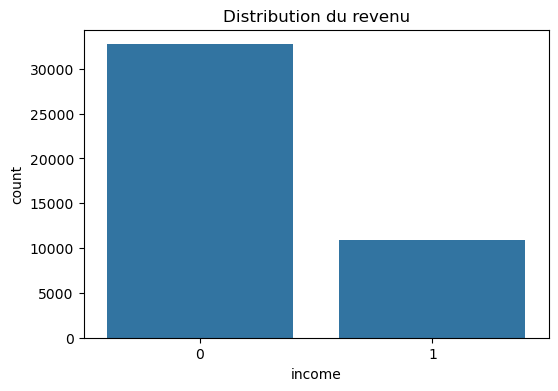

In [30]:
#redistribution équilibrée
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="income")
plt.title("Distribution du revenu")
plt.show()


In [31]:
x =df.drop('income' , axis=1)
y =df['income']


In [32]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x, y = smote.fit_resample(x, y)
x=x.values
y=y.values


In [33]:
# Normalisation
mu = np.mean(x, axis=0)
sigma = np.std(x, axis=0)
X_norm = (x - mu) / sigma

In [34]:
# Division train/test
def train_test_split(X, y, test_size=0.2, seed=42):
    np.random.seed(seed)
    indices = np.random.permutation(len(X))
    taille_test = int(len(X) * test_size)
    test_idx = indices[:taille_test]
    train_idx = indices[taille_test:]
    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

X_train, X_test, y_train, y_test = train_test_split(X_norm, y)



In [35]:

# Fonctions du perceptron
def Parametres_du_debut(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return W, b

def Sortie_Z(X, W, b):
    Z = np.dot(X, W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

def Fonction_cout(A, y):
    y = y.reshape(-1, 1)
    log_loss = -np.mean(y * np.log(A + 1e-15) + (1 - y) * np.log(1 - A + 1e-15))
    return log_loss

def Gradient(A, X, y):
    y = y.reshape(-1, 1)
    dw = np.dot(X.T, (A - y)) / len(y)
    db = np.mean(A - y)
    return dw, db

def mise_a_jour(dw, db, W, b, alpha=0.1):
    W = W - alpha * dw
    b = b - alpha * db
    return W, b

def neurone_artificiel(X, y, alpha, iterations):
    W, b = Parametres_du_debut(X)
    Cout = []
    for i in range(iterations):
        A = Sortie_Z(X, W, b)
        cout = Fonction_cout(A, y)
        Cout.append(cout)
        dw, db = Gradient(A, X, y)
        W, b = mise_a_jour(dw, db, W, b, alpha)
    return W, b, Cout

def predire(X, W, b):
    A = Sortie_Z(X, W, b)
    return (A >= 0.5).astype(int).flatten()

def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)


In [36]:

# Entraînement
alpha = 0.1
iterations = 500
W, b, couts = neurone_artificiel(X_train, y_train, alpha, iterations)


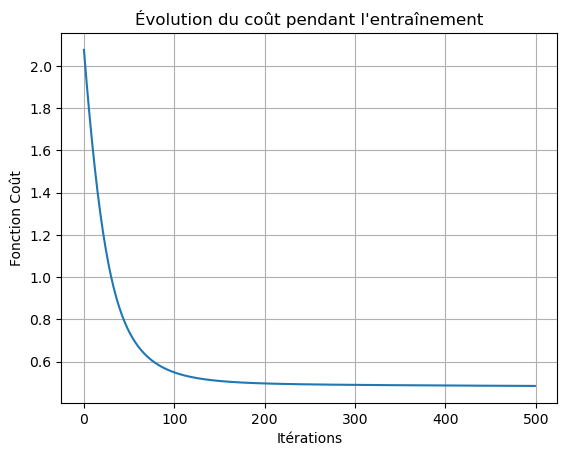

Accuracy sur le jeu test : 76.65%


In [37]:

# Affichage courbe de coût
plt.plot(couts)
plt.xlabel("Itérations")
plt.ylabel("Fonction Coût")
plt.title("Évolution du coût pendant l'entraînement")
plt.grid(True)
plt.show()

# Évaluation
y_pred_test = predire(X_test, W, b)
acc = accuracy(y_test, y_pred_test)
print(f"Accuracy sur le jeu test : {acc*100:.2f}%")


In [38]:
# Sauvegarde des paramètres (numpy)
np.save("W.npy", W)
np.save("b.npy", b)
np.save("mu.npy", mu)
np.save("sigma.npy", sigma)

# Sauvegarde des infos catégories (pour ré-encoder dans Flask)
import pickle
with open('categories.pkl', 'wb') as f:
    pickle.dump(cat_cols, f)
